# K-NEAREST NEIGHBORS CLASSIFICATION MODEL

#### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

#### Read & Store Data

In [2]:
df = pd.read_csv('Mammographic_Data_Cleaned.csv') # Read csv file

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 5 columns):
AGE         831 non-null float64
SHAPE       831 non-null int64
MARGIN      831 non-null int64
DENSITY     831 non-null int64
SEVERITY    831 non-null int64
dtypes: float64(1), int64(4)
memory usage: 32.6 KB


In [4]:
# Convert Datatype into Object b/c Nominal Features
for data in [df]:

    # Convert Data Type for SHAPE
    data['SHAPE'] = data['SHAPE'].astype(str)

    # Convert Data Type for MARGIN
    data['MARGIN'] = data['MARGIN'].astype(str)

    # Convert Data Type for DENSITY
    data['DENSITY'] = data['DENSITY'].astype(str)

#### Split Data (Independent Variables [X] & Dependent Variable [y])

In [5]:
dependentVar = 'SEVERITY'

X = df.loc[:, df.columns != dependentVar]
y = df[dependentVar].values

print("Number of observations and dimensions in 'X':", X.shape)
print("Number of observations in 'y':", y.shape)

Number of observations and dimensions in 'X': (831, 4)
Number of observations in 'y': (831,)


In [6]:
print(X, '\n')
print(y)

      AGE SHAPE MARGIN DENSITY
0    67.0     3      5       3
1    58.0     4      5       3
2    28.0     1      1       3
3    57.0     1      5       3
4    76.0     1      4       3
..    ...   ...    ...     ...
826  47.0     2      1       3
827  56.0     4      5       3
828  64.0     4      5       3
829  66.0     4      5       3
830  62.0     3      3       3

[831 rows x 4 columns] 

[1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0
 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0
 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1
 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1
 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1
 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1
 0

#### Encode Independent Variables [X]

In [7]:
X = pd.get_dummies(X)

X.shape

(831, 14)

In [8]:
features = X.columns.tolist()

print(features)

['AGE', 'SHAPE_1', 'SHAPE_2', 'SHAPE_3', 'SHAPE_4', 'MARGIN_1', 'MARGIN_2', 'MARGIN_3', 'MARGIN_4', 'MARGIN_5', 'DENSITY_1', 'DENSITY_2', 'DENSITY_3', 'DENSITY_4']


#### Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

print(X)

[[ 0.76580356 -0.54443719 -0.52583048 ... -0.2688086   0.31497039
  -0.09859277]
 [ 0.15166622 -0.54443719 -0.52583048 ... -0.2688086   0.31497039
  -0.09859277]
 [-1.89545824  1.83675916 -0.52583048 ... -0.2688086   0.31497039
  -0.09859277]
 ...
 [ 0.56109111 -0.54443719 -0.52583048 ... -0.2688086   0.31497039
  -0.09859277]
 [ 0.69756608 -0.54443719 -0.52583048 ... -0.2688086   0.31497039
  -0.09859277]
 [ 0.42461615 -0.54443719 -0.52583048 ... -0.2688086   0.31497039
  -0.09859277]]


#### Split Data (Train & Test)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 32)

print("Number of observations and dimensions in training set:", X_train.shape)
print("Number of observations and dimensions in test set:", X_test.shape)
print("Number of observations in training set:", y_train.shape)
print("Number of observations in test set:", y_test.shape)

Number of observations and dimensions in training set: (623, 14)
Number of observations and dimensions in test set: (208, 14)
Number of observations in training set: (623,)
Number of observations in test set: (208,)


## K-NEAREST NEIGHBORS

#### Build Model on Training Data

In [11]:
from sklearn.neighbors import KNeighborsClassifier

kNNModel = KNeighborsClassifier()
kNNModel.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### Predict on Testing Data

In [12]:
y_pred = kNNModel.predict(X_test)

print(y_pred)

[1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0
 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1
 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1
 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1
 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0]


#### Numeric Analysis

In [13]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix \n")

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")

from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")

from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")

from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

[[83 32]
 [22 71]] : is the confusion matrix 

0.7403846153846154 : is the accuracy score
0.6893203883495146 : is the precision score
0.7634408602150538 : is the recall score
0.7244897959183674 : is the f1 score


#### Graphical Analysis

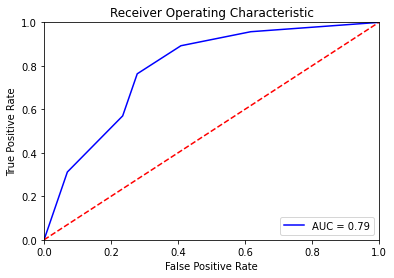

In [14]:
from sklearn.metrics import roc_curve, auc

probs               = kNNModel.predict_proba(X_test)
preds               = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc             = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## K-NEAREST NEIGHBORS TUNING

#### Define Grid Search Paramters

In [15]:
param_grid_knn = {
    'n_neighbors': [2, 5, 10, 15],                                   # Number of K
    'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],          # Algorithm to compute nearest neighbors
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']   # Algorithm to find the distance
}

#### Hyperparamter Tune using Training Data

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

kNNModel_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, verbose=1, 
                    cv=10, n_jobs=-1)

kNNModel_grid.fit(X_train, y_train)

print(kNNModel_grid.best_score_)
print(kNNModel_grid.best_estimator_)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s


0.8041733547351525
KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:    2.1s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Predict on Testing Data

In [17]:
y_pred = kNNModel_grid.predict(X_test)

print(y_pred)

[1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0
 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1
 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1
 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1
 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0]


#### Numeric Analysis

In [18]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix \n")

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")

from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")

from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")

from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

[[83 32]
 [20 73]] : is the confusion matrix 

0.75 : is the accuracy score
0.6952380952380952 : is the precision score
0.7849462365591398 : is the recall score
0.7373737373737373 : is the f1 score


#### Graphical Analysis

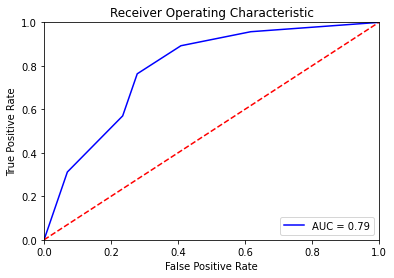

In [19]:
from sklearn.metrics import roc_curve, auc

probs               = kNNModel.predict_proba(X_test)
preds               = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc             = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### End of document.